In [1]:
# Import required libraries and dependencies
import pandas as pd
# (OpenAI): Removes the warning of KMeans memory leak. Must be called before
# KMeans is imported
import os
os.environ['OMP_NUM_THREADS'] = '1'
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def get_inertia(df):
    """
    THIS TAKES THE DATAFRAME GIVEN AND PRODUCES AN ELBOW CURVE OF CLUSTERED
    DATA RETURNING BOTH ELBOW DATAFRAME AND THE PLOTTED CHART
    """
    k = list(range(1, 11))
    inertia = []
    for i in k:
        k_model = KMeans(n_clusters=i, n_init='auto', random_state=2)
        k_model.fit(df)
        inertia.append(k_model.inertia_)
    
    elbow_data = {"k": k, "inertia": inertia}
    elbow_df = pd.DataFrame(elbow_data)
    elbow_plotted = elbow_df.plot.line(x="k",
                   y="inertia",
                   title="Elbow Curve",
                   xticks=k)
    
    difference_list = []
    k = elbow_df["k"]
    inertia = elbow_df["inertia"]
    for i in range(1, len(k)):
        percentage_decrease = (inertia[i-1] - inertia[i]) / inertia[i-1] * 100
        difference_list += [f"Percentage decrease from k={k[i-1]} to k={k[i]}: {percentage_decrease:.2f}%"]
    
    # Return the data
    return elbow_df, elbow_plotted, difference_list


In [2]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [4]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
crypto_scaled = StandardScaler().fit_transform(market_data_df)

In [5]:
# Create a DataFrame with the scaled data
crypto_scaled_df = pd.DataFrame(crypto_scaled, columns=market_data_df.columns)

# Copy the crypto names from the original data
# Did that above with .columns

# Set the coinid column as index
crypto_scaled_df['coin_id'] = market_data_df.index
crypto_scaled_df = crypto_scaled_df.set_index("coin_id")

# Display sample data
crypto_scaled_df.head(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

This step along with the plotting can be done with the function get_inertia(df) <br/>
elbow_df, elbow_plot = get_inertia(df)

In [6]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1, 11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=2)
    k_model.fit(crypto_scaled_df)
    inertia.append(k_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df.head()


,k,inertia
0,1,287.000000
1,2,198.571818
2,3,145.635748
3,4,79.022435
4,5,66.217780


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

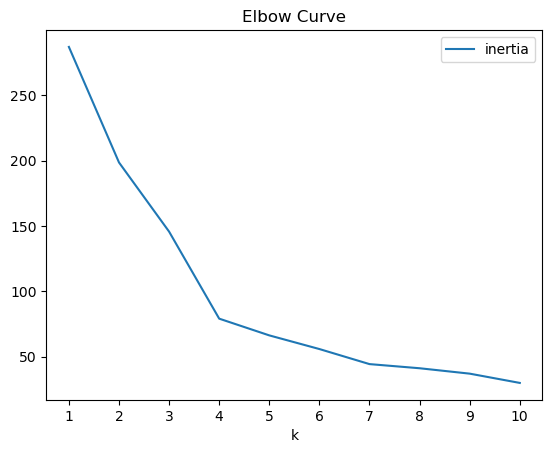

In [7]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_df.plot.line(x="k",
                   y="inertia",
                   title="Elbow Curve",
                   xticks=k)

<h3>Using the function method</h3>
<p>This section was added by me</p>

,k,inertia
0,1,287.000000
1,2,198.571818
2,3,145.635748
3,4,79.022435
4,5,66.217780


['Percentage decrease from k=1 to k=2: 30.81%',
 'Percentage decrease from k=2 to k=3: 26.66%',
 'Percentage decrease from k=3 to k=4: 45.74%',
 'Percentage decrease from k=4 to k=5: 16.20%',
 'Percentage decrease from k=5 to k=6: 15.79%',
 'Percentage decrease from k=6 to k=7: 20.67%',
 'Percentage decrease from k=7 to k=8: 7.16%',
 'Percentage decrease from k=8 to k=9: 10.07%',
 'Percentage decrease from k=9 to k=10: 19.22%']

<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

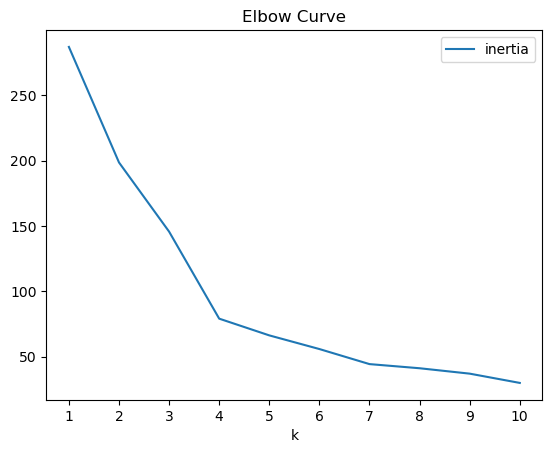

In [8]:
# Using the function method which includes a difference list between each k.
elbow_df, elbow_plotted, difference_list = get_inertia(crypto_scaled_df)
display(elbow_df.head(5))
display(difference_list)
elbow_plotted

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** The major difference toward the data tapering off occurs at clusters of 4.

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [9]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, n_init='auto', random_state=2)

In [10]:
# Fit the K-Means model using the scaled data
model.fit(crypto_scaled_df)

KMeans(n_clusters=4, random_state=2)

In [11]:
# Predict the clusters to group the cryptocurrencies using the scaled data
crypto_clusters = model.predict(crypto_scaled_df)

# View the resulting array of cluster values.
crypto_clusters

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0])

In [12]:
# Create a copy of the DataFrame
crypto_predictions = crypto_scaled_df.copy()

In [13]:
# Add a new column to the DataFrame with the predicted clusters
crypto_predictions['CryptoCluster'] = crypto_clusters

# Display sample data
crypto_predictions.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,CryptoCluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


<Axes: title={'center': 'Crypto Prediction Clusters'}, xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

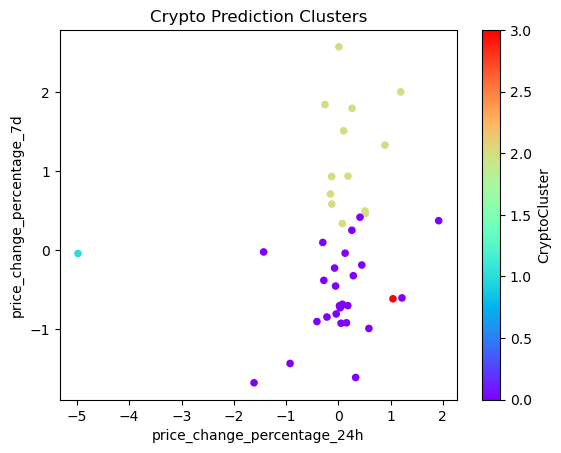

In [14]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
crypto_predictions.plot.scatter(x="price_change_percentage_24h",
                                y="price_change_percentage_7d",
                                c="CryptoCluster",
                                title="Crypto Prediction Clusters",
                                colormap="rainbow")

### Optimize Clusters with Principal Component Analysis.

In [15]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [16]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
crypto_pca = pca.fit_transform(crypto_scaled_df)

# View the first five rows of the DataFrame. 
crypto_pca[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [17]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.3719856 + 0.34700813 + 0.17603793 = 0.89503166 or 89.50% of the total explained variance.

In [18]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you <--- WHERE?

# Creating a DataFrame with the PCA data
crypto_pca_df = pd.DataFrame(crypto_pca, columns=["PCA1","PCA2","PCA3"])

# Copy the crypto names from the original data
crypto_pca_df['coin_id'] = market_data_df.index

# Set the coinid column as index
crypto_pca_df = crypto_pca_df.set_index("coin_id")

# Display sample data
crypto_pca_df.head(5)

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


### Find the Best Value for k Using the PCA Data

This step along with the plotting can be done with the function get_inertia(df) <br/>
elbow_df, elbow_plotted, difference_list = get_inertia(crypto_pca_df)

In [19]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1, 11))

# Create an empty list to store the inertia values
inertia =[]

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=2)
    k_model.fit(crypto_pca_df)
    inertia.append(k_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df.head()


,k,inertia
0,1,256.874086
1,2,168.811896
2,3,115.918077
3,4,49.665497
4,5,38.584870


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

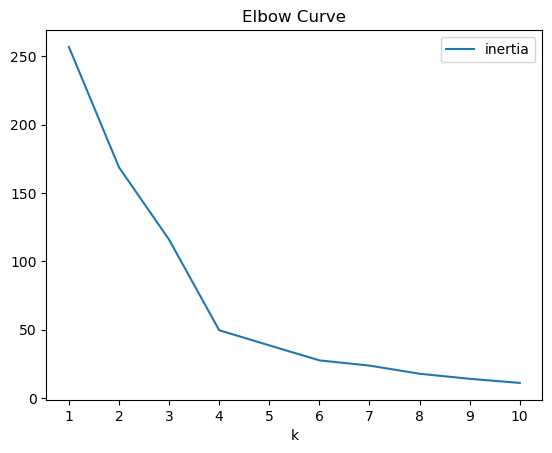

In [20]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_df.plot.line(x="k",
                   y="inertia",
                   title="Elbow Curve",
                   xticks=k)

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for k appears to be 4 clusters since after 4, the data tapers off.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** It doesn't appear to be different from the original data.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [37]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, n_init='auto', random_state=2)

In [38]:
# Fit the K-Means model using the PCA data
model.fit(crypto_pca_df)

KMeans(n_clusters=4, random_state=2)

In [39]:
# Predict the clusters to group the cryptocurrencies using the PCA data
k_4 = model.predict(crypto_pca_df)

# Print the resulting array of cluster values.
k_4

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0])

In [40]:
# Create a copy of the DataFrame with the PCA data
crypto_pca_predict_df = crypto_pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
crypto_pca_predict_df['Crypto_pca_clusters'] = k_4

# Display sample data
crypto_pca_predict_df.head(5)

,PCA1,PCA2,PCA3,Crypto_pca_clusters
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


<Axes: title={'center': 'PCA Scatter'}, xlabel='PCA1', ylabel='PCA2'>

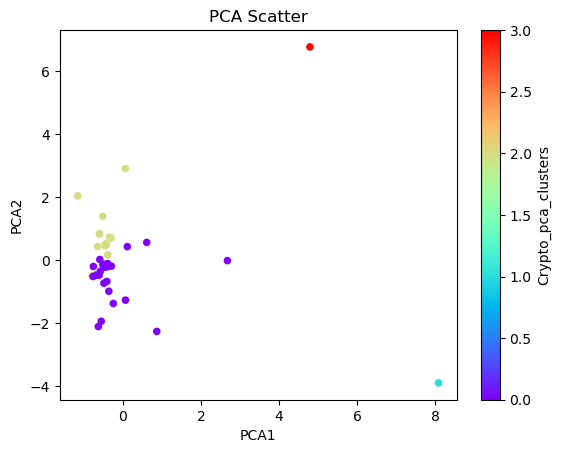

In [41]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
crypto_pca_predict_df.plot.scatter(x="PCA1",
                                    y="PCA2",
                                    c="Crypto_pca_clusters",
                                    title="PCA Scatter",
                                    colormap="rainbow")

### Determine the Weights of Each Feature on each Principal Component

In [42]:
# Use the columns from the original scaled DataFrame as the index.
pca_component_weights = pd.DataFrame(pca.components_.T, columns=["PCA1","PCA2","PCA3"], index=crypto_scaled_df.columns)
pca_component_weights.head()

,PCA1,PCA2,PCA3
price_change_percentage_24h,-0.416728,0.358162,-0.218795
price_change_percentage_7d,-0.102432,0.227432,0.787670
price_change_percentage_14d,-0.009162,0.540415,0.349534
price_change_percentage_30d,0.191523,0.562182,-0.181744
price_change_percentage_60d,0.320365,0.434040,-0.361377


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** Under PCA1, the strongest positive influence is the price_change_percentage_60d at 0.320365 while the negative is _24 at (-0.416728).<br/>
Under PCA2, the strongest positive influence is the _30d at (0.562182) while the negative is _14d at (0.540415). <br/>
Under PCA3, the strongest positive influence is the _7d at (0.787670) while the negative is _60d at (-0.361377).
    